In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка
train_df = pd.read_json('train.json')
test_df = pd.read_json('test.json')

# Объединяем список ингредиентов в строку
train_df['ingredients_str'] = train_df['ingredients'].apply(lambda x: ' '.join(x))
test_df['ingredients_str'] = test_df['ingredients'].apply(lambda x: ' '.join(x))

# Разделение на тренировку и валидацию
X = train_df['ingredients_str']
y = train_df['cuisine']
X_train_texts, X_val_texts, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Векторизация (One-Hot по ингредиентам)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train_texts)
X_val = vectorizer.transform(X_val_texts)
X_test = vectorizer.transform(test_df['ingredients_str'])


In [2]:
# 2. Классификатор CatBoost.
!pip install catboost

You should consider upgrading via the '/home/dzmitry/.pyenv/versions/3.10.0/bin/python3.10 -m pip install --upgrade pip' command.


Accuracy: 0.6093
Classification Report:


/home/dzmitry/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dzmitry/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dzmitry/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

              precision    recall  f1-score   support

   brazilian       1.00      0.19      0.32        84
     british       0.00      0.00      0.00       157
cajun_creole       0.84      0.49      0.62       328
     chinese       0.61      0.82      0.70       510
    filipino       0.00      0.00      0.00       136
      french       0.53      0.09      0.16       550
       greek       0.74      0.43      0.54       249
      indian       0.75      0.76      0.75       602
       irish       1.00      0.09      0.17       151
     italian       0.53      0.91      0.67      1567
    jamaican       0.88      0.31      0.46        91
    japanese       0.88      0.44      0.59       284
      korean       0.86      0.30      0.45       166
     mexican       0.81      0.87      0.84      1336
    moroccan       0.82      0.32      0.46       166
     russian       1.00      0.06      0.11        89
 southern_us       0.40      0.66      0.50       848
     spanish       0.73    

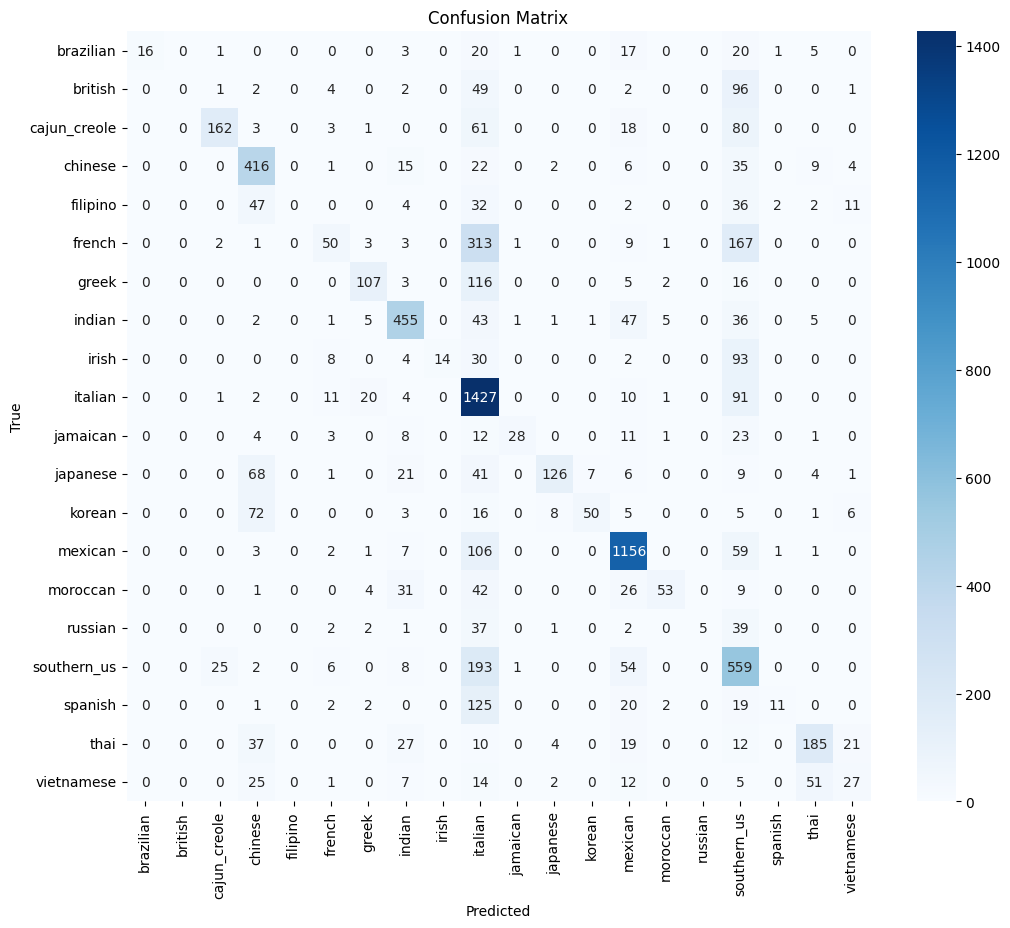

In [3]:
# Классификатор CatBoostClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Создание и обучение классификатора CatBoost
clf = CatBoostClassifier(
    iterations=100, 
    learning_rate=0.1,
    depth=3, 
    random_state=42, 
    verbose=0,
)
clf.fit(X_train, y_train)

# Предсказания на валидации
y_val_pred = clf.predict(X_val)

# Метрики
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print("Classification Report:")
print(classification_report(y_val, y_val_pred))


# Матрица ошибок
cm = confusion_matrix(y_val, y_val_pred, labels=clf.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, xticklabels=clf.classes_, yticklabels=clf.classes_, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Классификатор ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Создание и обучение классификатора Extra Trees
clf = ExtraTreesClassifier(n_estimators=100, max_features='sqrt', random_state=42)
clf.fit(X_train, y_train)

# Предсказания на валидации
y_val_pred = clf.predict(X_val)

# Метрики
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

# Матрица ошибок
cm = confusion_matrix(y_val, y_val_pred, labels=clf.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, xticklabels=clf.classes_, yticklabels=clf.classes_, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# классификатор AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Определение базовой модели (слабой)
base_model = DecisionTreeClassifier(max_depth=1)

# Инициализация AdaBoost
adaboost = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Обучение модели
adaboost.fit(X_train, y_train)

# Предсказания на валидации
y_val_pred = adaboost.predict(X_val)

# Метрики
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print("Classification Report:")
print(classification_report(y_val, y_val_pred, zero_division=0))  # подавляем предупреждения

# Матрица ошибок
cm = confusion_matrix(y_val, y_val_pred, labels=adaboost.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, xticklabels=adaboost.classes_, yticklabels=adaboost.classes_, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# классификатор KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Создание модели (k=3 по умолчанию)
knn = KNeighborsClassifier(n_neighbors=3)

# Обучение модели
knn.fit(X_train, y_train)

# Предсказания на валидации
y_val_pred = knn.predict(X_val)


# # Предсказание на тестовых данных
# y_pred = knn.predict(X_test)


# Метрики
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

# Матрица ошибок
cm = confusion_matrix(y_val, y_val_pred, labels=knn.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, xticklabels=knn.classes_, yticklabels=knn.classes_, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# классификатор LightGBM
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Приведение типов
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)

# Обучение LightGBM
lgbm = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)
lgbm.fit(X_train, y_train)

# Предсказания
y_val_pred = lgbm.predict(X_val)

# Метрики
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print("Classification Report:")
print(classification_report(y_val, y_val_pred, zero_division=0))

# Матрица ошибок
cm = confusion_matrix(y_val, y_val_pred, labels=lgbm.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, xticklabels=lgbm.classes_, yticklabels=lgbm.classes_, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
